# Proto

Protocol Buffers are a defined interface for the serialization of structured data. It defines a normalized way to communicate, utterly independent of languages and platforms.

The ProtoBuf interface describes the structure of the data to be sent. Payload structures are defined as “messages” in what is called Proto-Files. Those files always end with a .proto extension.


Google’s Flatbuffers and a third party implementation, called Cap’n Proto, are more focused on removing the parsing and unpacking step, which is necessary to access the actual data when using ProtoBufs. They have been designed explicitly for performance-critical applications, making them even faster and more memory efficient than ProtoBuf.


https://developers.google.com/protocol-buffers/docs/pythontutorial  
https://googleapis.dev/python/protobuf/latest/  


[Beating JSON performance with Protobuf](https://auth0.com/blog/beating-json-performance-with-protobuf/)

navigating an XML DOM tree is considerably more complicated than navigating simple fields in a class normally would be.

## 安装

In [ ]:
sudo apt install protobuf-compiler # 仅编译器
conda install protobuf # 支持python

## 验证

In [ ]:
!protoc --version

To generate usable integration code, we use the proto compiler which compiles a given .proto file into language-specific integration classes. In our case we use the --python-out argument to generate Python-specific code.

## 编译

To compile the .proto file to the language class of our choice, we use protoc, the proto compiler.  
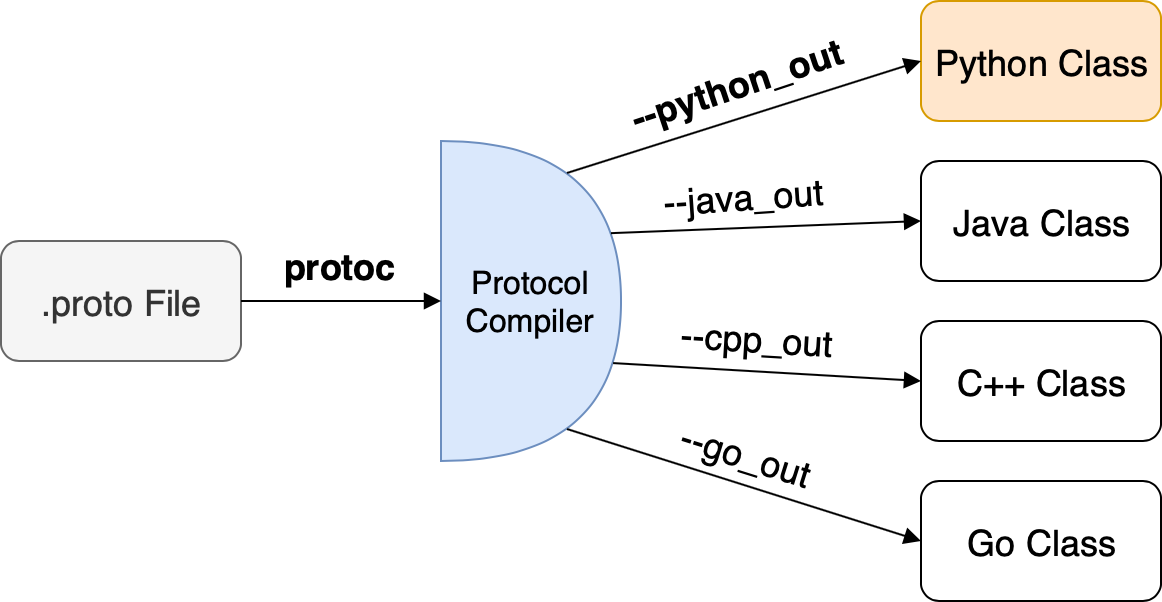
refer to: https://www.freecodecamp.org/news/googles-protocol-buffers-in-python/  

In [ ]:
!protoc -h

In [ ]:
!code .

<code>protoc -I=$SRC_DIR --python_out=$DST_DIR $SRC_DIR/addressbook.proto</code>

SRC_DIR is source directory (where your application's source code lives – the current directory is used if you don't provide a value)  
DST_DIR is destination directory (where you want the generated code to go; often the same as $SRC_DIR)

### 同时编译相同目录下的多个XX.proto文件
refer to: https://blog.csdn.net/nsurl/article/details/110132134  

In [ ]:
!protoc ./cases/case_proto2/*.proto --proto_path=. --python_out=.

In [ ]:
protoc --proto_path=IMPORT_PATH --cpp_out=DST_DIR path/to/file.proto


### 编译指定目录下的A.proto文件，该文件调用其他目录下的B.proto文件

In [ ]:
!protoc ./cases/case_proto3/map_geometry.proto --proto_path=. --python_out=.

In [ ]:
--proto_path=. 已当前目录作为根目录搜索XX.proto  
--python_out=. 在XX.proto的当前目录中生成XX_pb2.py

### 编译单个XX.proto文件, message types nested inside other messages

In [ ]:
!protoc ./cases/case_proto1/person.proto --python_out=.

## 使用
refer to: https://googleapis.dev/python/protobuf/latest/google/protobuf/message.html#google.protobuf.message.Message

function | description
:-|:-
ByteSize()| Returns the serialized size of this message.
IsInitialized()| Checks if the message is initialized (i.e. all of its required fields are set).
ListFields()| Returns a list of (FieldDescriptor, value) tuples for present fields.
HasField(field_name)| Checks if a certain field is set for the message.
CopyFrom(other_msg) | Copies the content of the specified message into the current message.<br>The method clears the current message and then merges the specified message using MergeFrom. 
MergeFrom(other_msg) | Merges the contents of the specified message into current message.<br>Singular fields that are set in the specified message overwrite the corresponding fields in the current message;<br>Repeated fields are appended.
MergeFromString(serialized) | Merges serialized protocol buffer data into this message.
ParseFromString(serialized)| Parse serialized protocol buffer data into this message.
SerializeToString() | Serializes the protocol message to a binary string.
SerializePartialToString() | This method is similar to SerializeToString but doesn’t check if the message is initialized.
\_\_str\_\_() | returns a human-readable representation of the message, particularly useful for debugging. Usually invoked as str(message) or print message.
ClearField(field_name) | Clears the contents of a given field.
Clear() | Clears all data that was set in the message.
WhichOneof(oneof_group) | Returns the name of the field that is set inside a oneof group.
**uncommonly used**: |
HasExtension(extension_handle) | Checks if a certain extension is present for this message.<br>Extensions are retrieved using the Extensions mapping (if present).
ClearExtension(extension_handle) | Clears the contents of a given extension.
UnknownFields() | Returns the UnknownFieldSet.
DiscardUnknownFields() | Clears all fields in the UnknownFieldSet.
SetInParent() |  Mark this as present in the parent.<br>This normally happens automatically when you assign a field of a sub-message, but sometimes you want to make the sub-message present while keeping it empty. If you find yourself using this, you may want to reconsider your design.

### 加载

In [ ]:
import cases.case_proto1.person_pb2 as person_pb2
print(person_pb2)

### Build a message

#### write a message

In [ ]:
p1 = person_pb2.Person()

p1.name = "Benzema"
p1.age = 20

score1 = p1.score.add()
score1.object = "python"
score1.score = 9

score2 = p1.score.add()
score2.object = "c++"
score2.score = 8

p1.number.phone = 123456789

# p1.number.type = person_pb2.Person.PhoneType.MOBILE
# p1.number.type = 1
setattr(p1.number, "type", 2)

In [ ]:
p1

#### Serialization
返回字符串的二进制

In [ ]:
proto_info = p1.SerializeToString() # 消息序列化
proto_info

In [ ]:
p1.SerializePartialToString()

In [ ]:
type(proto_info)

### Read a message

#### Deserializing

In [ ]:
p2 = person_pb2.Person()
p2.ParseFromString(proto_info) # 解析二进制消息

In [ ]:
print(p2, type(p2))

#### Parse the data from the message

In [ ]:
print(p2.name)

In [ ]:
print(p2.number.phone)

##### 获取attribute/属性

In [ ]:
p2.score

In [ ]:
p2.__getattribute__("score")

In [ ]:
getattr(p2, "score")

##### 遍历repeated

In [ ]:
for score_ in p2.score:
    print(score_.object, score_.score)

##### HasField()

In [ ]:
p2.HasField("name") # HasField()仅适用于required & optional

In [ ]:
p2.HasField("score") # HasField()仅适用于repeated

In [ ]:
p2.HasField("address")

##### ListFields()
https://googleapis.dev/python/protobuf/latest/google/protobuf/descriptor.html#google.protobuf.descriptor.FieldDescriptor

In [ ]:
p1

In [ ]:
for field_descriptor, value in p1.ListFields():
    print(field_descriptor, value)
    print("name = ", field_descriptor.name, " | full_name = ", field_descriptor.full_name, " | index = ", field_descriptor.index, " | number = ", field_descriptor.number,
          "\ntype = ", field_descriptor.type, " | label = ", field_descriptor.label,
          "\nhas_default_value = ", field_descriptor.has_default_value, " | default_value = ", field_descriptor.default_value, " | enum_type = ", field_descriptor.enum_type)
    print("\n")

TYPE_BOOL = 8  
TYPE_BYTES = 12  
TYPE_DOUBLE = 1  
TYPE_ENUM = 14  
TYPE_FIXED32 = 7  
TYPE_FIXED64 = 6  
TYPE_FLOAT = 2  
TYPE_GROUP = 10  
TYPE_INT32 = 5  
TYPE_INT64 = 3  
TYPE_MESSAGE = 11  
TYPE_SFIXED32 = 15  
TYPE_SFIXED64 = 16  
TYPE_SINT32 = 17  
TYPE_SINT64 = 18  
TYPE_STRING = 9  
TYPE_UINT32 = 13  
TYPE_UINT64 = 4  

LABEL_OPTIONAL = 1  
LABEL_REPEATED = 3  
LABEL_REQUIRED = 2  

In [ ]:
p2.number

In [ ]:
for field_descriptor, value in p2.number.ListFields():
    print(field_descriptor.name, field_descriptor.enum_type)

##### enum获取

In [ ]:
Enum = person_pb2.Person.PhoneType

In [ ]:
Enum.Name(0)

In [ ]:
Enum.Value("MOBILE")

In [ ]:
Enum.keys()

In [ ]:
Enum.values()

### copy & clean

#### 初始化

In [ ]:
p3 = person_pb2.Person()

In [ ]:
p3

In [ ]:
p3.IsInitialized()

In [ ]:
p3.ByteSize()

#### 复制

In [ ]:
p3.CopyFrom(p2)

In [ ]:
p3.__str__() # 消息的字符串

In [ ]:
str(p3) # 消息的字符串

In [ ]:
p3.IsInitialized()

In [ ]:
p3.ByteSize()

In [ ]:
type(p3)

In [ ]:
p3

#### 合并

In [ ]:
p3.MergeFrom(p2)

In [ ]:
p3

#### 删除一个Field

In [ ]:
p3.ClearField("score")

In [ ]:
p3

#### 清空

In [ ]:
p3.Clear()

In [ ]:
p3

## proto语法
proto2: https://developers.google.com/protocol-buffers/docs/proto  
proto3: https://developers.google.com/protocol-buffers/docs/proto3  

diff between proto2 and proto3:   
refer to: https://blog.csdn.net/u013210620/article/details/81317731  
proto3 字段前取消了required和optional两个关键字，目前可用的只有repeated关键字  

# capnp

## 安装





In [ ]:
conda install -c conda-forge pycapnp

## 使用
refer to: https://capnproto.github.io/pycapnp/quickstart.html

### 加载

In [ ]:
import capnp

In [ ]:
import cases.addressbook_capnp as addressbook_capnp

### Build a message
#### Initialize an object of struct
初始化一个struct的实例

In [ ]:
# Initialize an object of struct AddressBook
addresses = addressbook_capnp.AddressBook.new_message()

In [ ]:
addresses

In [ ]:
# Initialize an object of struct Person
person1 = addressbook_capnp.Person.new_message()

In [ ]:
person1

In [ ]:
person1.name = 'alice'

In [ ]:
person1

In [ ]:
# 等效方法
person2 = addressbook_capnp.Person.new_message(name='alice')

In [ ]:
person2

#### Add data to initialized object

In [ ]:
"""
init(): Allocating a list inside of an object/在对象内部为list分配空间
list is similar to repeated of proto
"""
people = addresses.init('people', 2)

In [ ]:
people

In [ ]:
alice = people[0]
alice.id = 123
alice.name = "Alice"
alice.email = "alice@example.com"
alicePhones = alice.init("phones", 1)
alicePhones[0].number = "555-1212"
alicePhones[0].type = "mobile"

In [ ]:
alice

In [ ]:
"""
union is similar to oneof of proto
"""
alice.employment.school = "MIT"

In [ ]:
alice

In [ ]:
"""
再次对union赋值，会覆盖之前的数据
"""
alice.employment.employer = "McGill"

In [ ]:
alice

In [ ]:
bob = people[1]
bob.id = 456
bob.name = "Bob"
bob.email = "bob@example.com"
bobPhones = bob.init("phones", 2)
bobPhones[0].number = "555-4567"
bobPhones[0].type = "home"
bobPhones[1].number = "555-7654"
bobPhones[1].type = "work"

In [ ]:
"""
Note: For Void types in Unions (and in general, but Void is really only used in Unions),
you will have to assign None to them.  
对于Union中的Void类型(通常，但Void实际上只在Union中使用)，须将None分配给它们
"""
bob.employment.unemployed = None

In [ ]:
bob

#### Serialization/Writing to a File

In [ ]:
file = open("./cases/addressbook.bin", "wb")

In [ ]:
# 方法1,比方法2更紧凑
addresses.write_packed(file)
file.seek(0)

In [ ]:
# 方法2
# addresses.write(file)

### Read a message

#### Deserializing/Reading from a file

In [ ]:
file = open("./cases/addressbook.bin", "rb")

In [ ]:
# 方法1
addresses = addressbook_capnp.AddressBook.read_packed(file)

In [ ]:
# 方法2
# addresses = addressbook_capnp.AddressBook.read(file)

#### Parse the data from the message

In [ ]:
for person in addresses.people:
    print("\n"+person.name+": "+person.email)
    for phone in person.phones:
        print(phone.type, ":", phone.number)
    
    # Reading Unions
    which = person.employment.which() # which(): 查询union中设置的字段
    print("union type:", which)
    if which == "unemployed":
        print("unemployed:", person.employment.unemployed)
    elif which == "employer":
        print("employer:", person.employment.employer)
    elif which == "school":
        print("student:", person.employment.school)
    elif which == "selfEmployed":
        print("self employed:", person.employment.selfEmployed)

#### hasattr()

In [ ]:
similar to HasField()
待整理: https://docs.python.org/3/library/functions.html#hasattr
        
print("cfz test3 |", hasattr(request, "waypoint"))
print("cfz test4 |", getattr(request, "waypoint"))
print("cfz test5 |", request.__getattr__("waypoint"))
print("cfz test6 |", request.__getattribute__("waypoint"))

### addressbook.capnp
数据类型|候选项
:-|:-
Boolean | Bool
Integers | Int8, Int16, Int32, Int64
Unsigned integers | UInt8, UInt16, UInt32, UInt64
Floating-point | Float32, Float64
Blobs | Text, Data

In [ ]:
@0x934efea7f017fff0;

const qux :UInt32 = 123;

struct Person {
  id @0 :UInt32;
  name @1 :Text;
  email @2 :Text;
  phones @3 :List(PhoneNumber);

  struct PhoneNumber {
    number @0 :Text;
    type @1 :Type;

    enum Type {
      mobile @0;
      home @1;
      work @2;
    }
  }
  employment :union {
    unemployed @4 :Void;
    employer @5 :Text;
    school @6 :Text;
    selfEmployed @7 :Void;
    # We assume that a person is only one of these.
  }

  testGroup :group {
    field1 @8 :UInt32;
    field2 @9 :UInt32;
    field3 @10 :UInt32;
  }
  extraData @11 :Data;
}

struct AddressBook {
  people @0 :List(Person);
}